# Web scraping job data from Glassdoor

In [138]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [139]:
# Replace the website link of Glassdoor job search if needed
website = "https://www.glassdoor.com/Job/jobs.htm?sc.occupationParam=%22data+analyst%22"
#website = "https://www.glassdoor.com/Job/data-analyst-jobs-SRCH_KO0,12.htm?fromAge=1"

driver = webdriver.Chrome()
driver.get(website)

In [6]:
def close_login_popup(driver):
    """
    Closes the login popup window if it is present.

    Input:
    - driver: Selenium WebDriver object.
    """
    try:
        # Check for login popup, if present then click CloseButton
        close_login_popup = driver.find_element(By.CLASS_NAME,"CloseButton")
        close_login_popup.click()
        close_login_popup.click()
    except:
        time.sleep(0)

In [7]:
def click_show_more(driver, num_iteration):
    """
    Clicks the 'Show more jobs' button a specified number of times.

    Inputs:
    - driver: Selenium WebDriver object.
    - num_iteration (int): Number of times to click the 'Show more jobs' button.
    """
    for i in tqdm(range(num_iteration), desc ="Progress"):

        close_login_popup(driver)

        try:
            time.sleep(3)
            all_matches_button = driver.find_element(By.CSS_SELECTOR, '[data-test="load-more"]')
        except:
            time.sleep(0)
            print("Show more jobs button not found")

        close_login_popup(driver)
        all_matches_button.click()

In [8]:
def glassdoor_web_scraping(driver):
    """
    Scrapes job details from Glassdoor website using the provided Selenium driver.

    Input:
    - driver: Selenium WebDriver object.

    Output:
    - job_dataset: DataFrame containing scraped job details.
    """
    job_records = []

    close_login_popup(driver)
    all_jobs_list = driver.find_elements(By.XPATH, "//li[@class='JobsList_jobListItem__wjTHv']")

    for job in tqdm(all_jobs_list, desc="Progress"):

        job_record = {}

        close_login_popup(driver)
        job.click()
        time.sleep(4)

        try:
            show_more_button = driver.find_element(By.CLASS_NAME, "JobDetails_showMore___Le6L")
            close_login_popup(driver)
            show_more_button.click()
        except:
            time.sleep(0)

        job_details_tab = driver.find_element(By.CLASS_NAME, "JobDetails_jobDetailsContainer__y9P3L")

        job_record["job_id"] = ""
        job_record["company"] = ""
        job_record["job_title"] = ""
        job_record["company_rating"] = ""
        job_record["job_description"] = ""
        job_record["location"] = ""
        job_record["salary_avg_estimate"] = ""
        job_record["salary_estimate_payperiod"] = ""
        job_record["company_size"] = ""
        job_record["company_founded"] = ""
        job_record["employment_type"] = ""
        job_record["industry"] = ""
        job_record["sector"] = ""
        job_record["revenue"] = ""
        job_record["career_opportunities_rating"] = ""
        job_record["comp_and_benefits_rating"] = ""
        job_record["culture_and_values_rating"] = ""
        job_record["senior_management_rating"] = ""
        job_record["work_life_balance_rating"] = ""

        try:
            job_element = job_details_tab.find_element(By.CLASS_NAME, "JobDetails_jobTitle__Xvsha")
            job_id = job_element.get_attribute("id")
            job_record["job_id"] = ''.join(filter(str.isdigit, job_id))
        except:
            pass   

        try:
            company = job_details_tab.find_element(By.CLASS_NAME, "EmployerProfile_employerName__qujuA")
            job_record["company"] = company.text
        except:
            pass

        try:
            job_title = job_details_tab.find_element(By.CLASS_NAME, "JobDetails_jobTitle__Xvsha")
            job_record["job_title"] = job_title.text
        except:
            pass

        try:
            company_rating = job_details_tab.find_element(By.CLASS_NAME, "EmployerProfile_ratingContainer__ul0Ef")
            job_record["company_rating"] = company_rating.text
        except:
            pass

        try:
            job_description = job_details_tab.find_element(By.CLASS_NAME, "JobDetails_jobDescription__uW_fK")
            job_record["job_description"] = job_description.text
        except:
            pass

        try:
            location = job_details_tab.find_element(By.CLASS_NAME, "JobDetails_location__mSg5h")
            job_record["location"] = location.text
        except:
            pass

        try:
            salary_avg_estimate = job_details_tab.find_element(By.CLASS_NAME, "SalaryEstimate_averageEstimate__xIgkL")
            job_record["salary_avg_estimate"] = salary_avg_estimate.text
        except:
            pass

        try:
            salary_estimate_payperiod = job_details_tab.find_element(By.CLASS_NAME, "SalaryEstimate_payPeriod__RsvG_")
            job_record["salary_estimate_payperiod"] = salary_estimate_payperiod.text
        except:
            pass

        try:
            company_overview_values = job_details_tab.find_elements(By.CLASS_NAME, "JobDetails_overviewItemValue__xn8EF")
            if len(company_overview_values) == 6:
                job_record.update({
                    "company_size": company_overview_values[0].text,
                    "company_founded": company_overview_values[1].text,
                    "employment_type": company_overview_values[2].text,
                    "industry": company_overview_values[3].text,
                    "sector": company_overview_values[4].text,
                    "revenue": company_overview_values[5].text
                })
        except:
            pass

        try:
            company_ratings = job_details_tab.find_elements(By.CLASS_NAME, "JobDetails_ratingScore___xSXK")
            if len(company_ratings) == 5:
                job_record.update({
                    "career_opportunities_rating": company_ratings[0].text,
                    "comp_and_benefits_rating": company_ratings[1].text,
                    "culture_and_values_rating": company_ratings[2].text,
                    "senior_management_rating": company_ratings[3].text,
                    "work_life_balance_rating": company_ratings[4].text
                })
        except:
            pass

        job_records.append(job_record)

    job_dataset = pd.concat([pd.DataFrame([record]) for record in job_records], ignore_index=True)
    return job_dataset

In [9]:
click_show_more(driver, 40)

Progress:  72%|██████████████████████████▊          | 29/40 [01:34<00:36,  3.27s/it]

Show more jobs button not found


StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=122.0.6261.69); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
0   chromedriver                        0x000000010313853c chromedriver + 3966268
1   chromedriver                        0x0000000103130ac8 chromedriver + 3934920
2   chromedriver                        0x0000000102db3da0 chromedriver + 277920
3   chromedriver                        0x0000000102db8648 chromedriver + 296520
4   chromedriver                        0x0000000102db9fe0 chromedriver + 303072
5   chromedriver                        0x0000000102dba078 chromedriver + 303224
6   chromedriver                        0x0000000102df7d64 chromedriver + 556388
7   chromedriver                        0x0000000102decd3c chromedriver + 511292
8   chromedriver                        0x0000000102dec8a8 chromedriver + 510120
9   chromedriver                        0x0000000102e2ebf0 chromedriver + 781296
10  chromedriver                        0x0000000102deafb0 chromedriver + 503728
11  chromedriver                        0x0000000102deba28 chromedriver + 506408
12  chromedriver                        0x00000001030fd724 chromedriver + 3725092
13  chromedriver                        0x0000000103101c18 chromedriver + 3742744
14  chromedriver                        0x00000001030e620c chromedriver + 3629580
15  chromedriver                        0x0000000103102714 chromedriver + 3745556
16  chromedriver                        0x00000001030d9584 chromedriver + 3577220
17  chromedriver                        0x0000000103120f74 chromedriver + 3870580
18  chromedriver                        0x0000000103121118 chromedriver + 3871000
19  chromedriver                        0x0000000103130738 chromedriver + 3934008
20  libsystem_pthread.dylib             0x00000001851ba034 _pthread_start + 136
21  libsystem_pthread.dylib             0x00000001851b4e3c thread_start + 8


In [10]:
job_dataset = glassdoor_web_scraping(driver)

Progress: 100%|█████████████████████████████████| 900/900 [1:05:26<00:00,  4.36s/it]


In [11]:
job_dataset.head(5)

,job_id,company,job_title,company_rating,job_description,location,salary_avg_estimate,salary_estimate_payperiod,company_size,company_founded,employment_type,industry,sector,revenue,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
0,1009082505452,Katahdin Valley Health Center,Nursing Director,2.8,POSITION SUMMARY\nThe Nursing Director provide...,"Brownville, ME","$88,309",/yr (Glassdoor est.),51 to 200 Employees,--,Nonprofit Organization,Health Care Services & Hospitals,Healthcare,$5 to $25 million (USD),2.6,3.0,2.7,1.9,2.6
1,1008933654369,Family Health La Clinica,Director of Finance,2.3,The Director of Finance is responsible for the...,"Stevens Point, WI","$120,114",/yr (Glassdoor est.),1 to 50 Employees,--,Company - Private,Health Care Services & Hospitals,Healthcare,$5 to $25 million (USD),2.5,4.2,2.3,2.1,1.6
2,1009005784590,Slocum Dickson Medical Group,Reimbursement Specialist,,JOB SUMMARY: This position is responsible for ...,"New Hartford, NY","$70,000",/yr (Employer est.),Unknown,--,Company - Private,Nursing Care Facilities,Healthcare,Unknown / Non-Applicable,2.8,2.8,2.9,2.0,3.0
3,1009065640243,Imperial Beach Community Clinic,"Director, Quality Improvement",3.1,Imperial Beach Community Clinic will promote a...,"San Diego, CA","$107,500",/yr (Employer est.),Unknown,--,Nonprofit Organization,Health Care Services & Hospitals,Healthcare,Unknown / Non-Applicable,3.3,3.1,3.3,3.6,4.3
4,1009065640243,Imperial Beach Community Clinic,"Director, Quality Improvement",3.1,Imperial Beach Community Clinic will promote a...,"San Diego, CA","$107,500",/yr (Employer est.),Unknown,--,Nonprofit Organization,Health Care Services & Hospitals,Healthcare,Unknown / Non-Applicable,3.3,3.1,3.3,3.6,4.3


In [12]:
# Save job_dataset to excel
job_dataset.to_excel('job_dataset_022824.xlsx', index=False)
# Save job_dataset to csv
job_dataset.to_csv('job_dataset_022824.csv', index=False)

In [12]:
# time.sleep(10)
driver.quit()

# Open the saved job_dataset excel file

In [13]:
# Open the job_dataset excel file
df = pd.read_excel("job_dataset_022824.xlsx")

# Assess Data: Quality and Tidiness

## 1. Inspect datasets:

In [14]:
df.head(5)

,job_id,company,job_title,company_rating,job_description,location,salary_avg_estimate,salary_estimate_payperiod,company_size,company_founded,employment_type,industry,sector,revenue,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
0,1009082505452,Katahdin Valley Health Center,Nursing Director,2.8,POSITION SUMMARY\nThe Nursing Director provide...,"Brownville, ME","$88,309",/yr (Glassdoor est.),51 to 200 Employees,--,Nonprofit Organization,Health Care Services & Hospitals,Healthcare,$5 to $25 million (USD),2.6,3.0,2.7,1.9,2.6
1,1008933654369,Family Health La Clinica,Director of Finance,2.3,The Director of Finance is responsible for the...,"Stevens Point, WI","$120,114",/yr (Glassdoor est.),1 to 50 Employees,--,Company - Private,Health Care Services & Hospitals,Healthcare,$5 to $25 million (USD),2.5,4.2,2.3,2.1,1.6
2,1009005784590,Slocum Dickson Medical Group,Reimbursement Specialist,NaN,JOB SUMMARY: This position is responsible for ...,"New Hartford, NY","$70,000",/yr (Employer est.),Unknown,--,Company - Private,Nursing Care Facilities,Healthcare,Unknown / Non-Applicable,2.8,2.8,2.9,2.0,3.0
3,1009065640243,Imperial Beach Community Clinic,"Director, Quality Improvement",3.1,Imperial Beach Community Clinic will promote a...,"San Diego, CA","$107,500",/yr (Employer est.),Unknown,--,Nonprofit Organization,Health Care Services & Hospitals,Healthcare,Unknown / Non-Applicable,3.3,3.1,3.3,3.6,4.3
4,1009065640243,Imperial Beach Community Clinic,"Director, Quality Improvement",3.1,Imperial Beach Community Clinic will promote a...,"San Diego, CA","$107,500",/yr (Employer est.),Unknown,--,Nonprofit Organization,Health Care Services & Hospitals,Healthcare,Unknown / Non-Applicable,3.3,3.1,3.3,3.6,4.3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   job_id                       900 non-null    int64  
 1   company                      900 non-null    object 
 2   job_title                    900 non-null    object 
 3   company_rating               812 non-null    float64
 4   job_description              874 non-null    object 
 5   location                     900 non-null    object 
 6   salary_avg_estimate          765 non-null    object 
 7   salary_estimate_payperiod    765 non-null    object 
 8   company_size                 813 non-null    object 
 9   company_founded              813 non-null    object 
 10  employment_type              813 non-null    object 
 11  industry                     813 non-null    object 
 12  sector                       813 non-null    object 
 13  revenue             

In [16]:
df.describe()

,job_id,company_rating,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
count,9.000000e+02,812.000000,796.000000,796.000000,796.000000,796.000000,796.000000
mean,1.009053e+12,3.718227,3.451005,3.483794,3.633166,3.382538,3.618342
std,2.327313e+08,0.566219,0.667813,0.606963,0.670008,0.703958,0.633997
min,1.006460e+12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.009068e+12,3.500000,3.000000,3.200000,3.200000,3.000000,3.300000
50%,1.009120e+12,3.750000,3.500000,3.500000,3.700000,3.400000,3.600000
75%,1.009139e+12,4.000000,3.800000,3.900000,4.000000,3.700000,4.000000
max,1.009148e+12,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [17]:
df.isnull().sum()

job_id                           0
company                          0
job_title                        0
company_rating                  88
job_description                 26
location                         0
salary_avg_estimate            135
salary_estimate_payperiod      135
company_size                    87
company_founded                 87
employment_type                 87
industry                        87
sector                          87
revenue                         87
career_opportunities_rating    104
comp_and_benefits_rating       104
culture_and_values_rating      104
senior_management_rating       104
work_life_balance_rating       104
dtype: int64

In [18]:
df[df.job_description.isnull()]

,job_id,company,job_title,company_rating,job_description,location,salary_avg_estimate,salary_estimate_payperiod,company_size,company_founded,employment_type,industry,sector,revenue,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
189,1009139805369,General Dynamics Information Technology,Lead Data Analyst,4.0,NaN,"Scott Air Force Base, IL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,1009139805369,General Dynamics Information Technology,Lead Data Analyst,4.0,NaN,"Scott Air Force Base, IL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,1009119728111,Tarzana Treatment Center,Data Analyst I,2.9,NaN,"Tarzana, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,1009119728111,Tarzana Treatment Center,Data Analyst I,2.9,NaN,"Tarzana, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,1009144223226,Kforce,Senior HC Data Analyst,3.9,NaN,"Bethesda, MD",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,1009144223226,Kforce,Senior HC Data Analyst,3.9,NaN,"Bethesda, MD",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,1009144872143,Northwest Energy Efficiency Alliance,"Data Analyst, Commercial Buildings and Integra...",3.3,NaN,"Portland, OR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,1009139354671,Kforce,Data Analyst,3.9,NaN,"Dallas, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,1009133865180,Kforce,Data Analyst,3.9,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,1009086287750,Saint Francis Health System,Trauma Research Data Analyst (On-Site),3.8,NaN,"Tulsa, OK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df[df.isnull().any(axis=1)]

,job_id,company,job_title,company_rating,job_description,location,salary_avg_estimate,salary_estimate_payperiod,company_size,company_founded,employment_type,industry,sector,revenue,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
2,1009005784590,Slocum Dickson Medical Group,Reimbursement Specialist,NaN,JOB SUMMARY: This position is responsible for ...,"New Hartford, NY","$70,000",/yr (Employer est.),Unknown,--,Company - Private,Nursing Care Facilities,Healthcare,Unknown / Non-Applicable,2.8,2.8,2.9,2.0,3.0
11,1009112841976,W Talent Solutions,Financial Analyst,NaN,"Summary\nThe Business Data Analyst, located at...","Harbor Springs, MI","$80,000",/yr (Employer est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1009145783183,"Caribbean Restaurants, LLC",Credit/Debit Data Analyst & Compliance,NaN,OPORTUNIDAD DE EMPLEO\nCredit/Debit Data Analy...,United States,$11.00,/hr (Employer est.),Unknown,--,Company - Public,--,--,Unknown / Non-Applicable,NaN,NaN,NaN,NaN,NaN
16,1009145783183,"Caribbean Restaurants, LLC",Credit/Debit Data Analyst & Compliance,NaN,OPORTUNIDAD DE EMPLEO\nCredit/Debit Data Analy...,United States,$11.00,/hr (Employer est.),Unknown,--,Company - Public,--,--,Unknown / Non-Applicable,NaN,NaN,NaN,NaN,NaN
20,1009143875251,Confidential,EMR Analyst (MA/Scribe),NaN,This is a 6+ month contract position. This is ...,"Chicago, IL",$26.00,/hr (Employer est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1009138928233,Paris Regional Health,PRH - Quality - Registered Nurse (RN) - Medica...,3.1,Job Summary: The Medical Staff Peer Review Coo...,"Paris, TX",NaN,NaN,501 to 1000 Employees,--,Hospital,Health Care Services & Hospitals,Healthcare,$500 million to $1 billion (USD),3.0,2.9,2.9,2.8,2.9
882,1009138928233,Paris Regional Health,PRH - Quality - Registered Nurse (RN) - Medica...,3.1,Job Summary: The Medical Staff Peer Review Coo...,"Paris, TX",NaN,NaN,501 to 1000 Employees,--,Hospital,Health Care Services & Hospitals,Healthcare,$500 million to $1 billion (USD),3.0,2.9,2.9,2.8,2.9
886,1008961743180,Children’s Hospital of Philadelphia,Analytics Engineer - Revenue Cycle,3.9,SHIFT:\nDay (United States of America)\nSeekin...,"Philadelphia, PA",NaN,NaN,10000+ Employees,1855,Nonprofit Organization,Health Care Services & Hospitals,Healthcare,$25 to $100 million (USD),4.0,3.8,3.9,3.4,3.6
893,1009141057009,LifeBridge Health,REVENUE CYCLE BILLILNG REIMBURSEMENT DATA ANALYST,3.5,REVENUE CYCLE BILLILNG REIMBURSEMENT DATA ANAL...,"Owings Mills, MD",NaN,NaN,10000+ Employees,1998,Nonprofit Organization,Health Care Services & Hospitals,Healthcare,$1 to $5 billion (USD),3.3,3.0,3.4,3.0,3.4


In [20]:
print(df.duplicated().sum()) 
df[df.duplicated(keep=False)]

289


,job_id,company,job_title,company_rating,job_description,location,salary_avg_estimate,salary_estimate_payperiod,company_size,company_founded,employment_type,industry,sector,revenue,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
50,1009068478852,The Collier Companies,Revenue & Data Analyst,3.5,The Collier Companies is seeking a Revenue & D...,"Gainesville, FL","$60,214",/yr (Glassdoor est.),201 to 500 Employees,1972,Private Practice / Firm,Real Estate,Real Estate,Unknown / Non-Applicable,3.7,3.8,3.5,3.2,3.1
60,1008923382443,US Tool Group,Data/Reporting Analyst,3.7,"Data / Reporting Analyst\nFarmington, MO\nOver...","Farmington, MO","$73,998",/yr (Glassdoor est.),Unknown,1958,Company - Private,Taxi & Car Services,Transportation & Logistics,Unknown / Non-Applicable,3.0,3.3,3.7,3.6,3.9
61,1008923382443,US Tool Group,Data/Reporting Analyst,3.7,"Data / Reporting Analyst\nFarmington, MO\nOver...","Farmington, MO","$73,998",/yr (Glassdoor est.),Unknown,1958,Company - Private,Taxi & Car Services,Transportation & Logistics,Unknown / Non-Applicable,3.0,3.3,3.7,3.6,3.9
63,1008855024065,Chalk Mountain Services,Operations Data Analyst,4.0,"Chalk Mountain Services of Texas, LLC (“Chalk”...","Fort Worth, TX","$63,193",/yr (Glassdoor est.),501 to 1000 Employees,2006,Contract,Energy & Utilities,"Energy, Mining & Utilities",$100 to $500 million (USD),3.1,4.0,3.3,2.9,2.6
64,1008855024065,Chalk Mountain Services,Operations Data Analyst,4.0,"Chalk Mountain Services of Texas, LLC (“Chalk”...","Fort Worth, TX","$63,193",/yr (Glassdoor est.),501 to 1000 Employees,2006,Contract,Energy & Utilities,"Energy, Mining & Utilities",$100 to $500 million (USD),3.1,4.0,3.3,2.9,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,1008872201288,FSA Federal,Administrative/Data Analyst Supporting the US ...,3.5,Be a part of the nationwide law enforcement in...,"Roanoke, VA",$21.76,/hr (Employer est.),1001 to 5000 Employees,2004,Company - Private,Staffing & Subcontracting,Human Resources & Staffing,$25 to $100 million (USD),2.6,2.9,3.2,3.4,3.5
891,1008872201288,FSA Federal,Administrative/Data Analyst Supporting the US ...,3.5,Be a part of the nationwide law enforcement in...,"Roanoke, VA",$21.76,/hr (Employer est.),1001 to 5000 Employees,2004,Company - Private,Staffing & Subcontracting,Human Resources & Staffing,$25 to $100 million (USD),2.6,2.9,3.2,3.4,3.5
892,1009115086266,Robert Half,Data & Reporting Analyst Property,3.8,Robert Half is currently working with a client...,"Concord, CA",$31.35,/hr (Employer est.),10000+ Employees,1948,Company - Public,HR Consulting,Human Resources & Staffing,$5 to $10 billion (USD),3.7,3.6,3.6,3.5,3.7
893,1009141057009,LifeBridge Health,REVENUE CYCLE BILLILNG REIMBURSEMENT DATA ANALYST,3.5,REVENUE CYCLE BILLILNG REIMBURSEMENT DATA ANAL...,"Owings Mills, MD",NaN,NaN,10000+ Employees,1998,Nonprofit Organization,Health Care Services & Hospitals,Healthcare,$1 to $5 billion (USD),3.3,3.0,3.4,3.0,3.4


In [21]:
df.job_id.value_counts()

1008961743180    13
1008855024065    11
1009068478852    10
1008923382443     9
1009114895100     9
                 ..
1009145792562     1
1009146608785     1
1009141077290     1
1009110999247     1
1008986700040     1
Name: job_id, Length: 388, dtype: int64

In [23]:
df.company.value_counts()

Kforce                                      32
FSA Federal                                 30
CACI                                        13
Children’s Hospital of Philadelphia         13
Everlight Solar                             12
                                            ..
Association of American Medical Colleges     1
Abrigo                                       1
DISA Global Solutions                        1
JT4                                          1
dimex                                        1
Name: company, Length: 354, dtype: int64

In [24]:
df.job_title.value_counts()

Data Analyst                                             237
Senior Data Analyst                                       37
Data Analyst I                                            14
Analytics Engineer - Revenue Cycle                        13
Domo Data Analyst (REMOTE)                                12
                                                        ... 
Football Analytics Data Analyst                            1
Data Analyst (HST)                                         1
Computer Data Analyst                                      1
Data Analyst 1                                             1
Entry Level Data Analyst, application via RippleMatch      1
Name: job_title, Length: 204, dtype: int64

In [26]:
df.job_title.value_counts().index

Index(['Data Analyst', 'Senior Data Analyst', 'Data Analyst I',
       'Analytics Engineer - Revenue Cycle', 'Domo Data Analyst (REMOTE)',
       'Finance Data Analyst', 'Operations Data Analyst',
       'Laboratory Data Analyst (Molecular Genetics)',
       'Revenue & Data Analyst', 'Sr. Data Analyst',
       ...
       'Experienced Data Analyst', 'Data Analyst (Remote Opportunity)',
       'Business/Data Analyst', 'Healthcare Data Analyst',
       'Residential Curbside Collection Specialist',
       'Football Analytics Data Analyst', 'Data Analyst (HST)',
       'Computer Data Analyst', 'Data Analyst 1',
       'Entry Level Data Analyst, application via RippleMatch'],
      dtype='object', length=204)

In [27]:
df.company_rating.value_counts().sort_index(ascending=False)

5.0     32
4.9      1
4.8      5
4.7      6
4.6      5
4.5     17
4.4     15
4.3     32
4.2     27
4.1     26
4.0    101
3.9     82
3.8     57
3.7     53
3.6     65
3.5     92
3.4     24
3.3     27
3.2     27
3.1     33
3.0     14
2.9     14
2.8     28
2.7      7
2.6      4
2.5      3
2.4      6
2.3      3
2.0      2
1.0      4
Name: company_rating, dtype: int64

In [28]:
df.location.value_counts()

Remote                   61
United States            26
Philadelphia, PA         25
New York, NY             20
Saint Louis, MO          20
                         ..
Picatinny Arsenal, NJ     1
Edwards AFB, CA           1
Stevens Point, WI         1
Alexandria, MN            1
South Hackensack, NJ      1
Name: location, Length: 231, dtype: int64

In [29]:
df.salary_avg_estimate.value_counts()

$70,000    21
$82,500    13
$60.00     12
$63,193    11
$87,500    11
           ..
$67,856     1
$63,500     1
$93,392     1
$74,361     1
$69,144     1
Name: salary_avg_estimate, Length: 271, dtype: int64

In [30]:
df.salary_estimate_payperiod.value_counts()

/yr (Glassdoor est.)    361
/yr (Employer est.)     265
/hr (Employer est.)     138
/mo (Employer est.)       1
Name: salary_estimate_payperiod, dtype: int64

In [31]:
df.revenue.value_counts()

Unknown / Non-Applicable            295
$25 to $100 million (USD)           102
$1 to $5 billion (USD)               98
$100 to $500 million (USD)           75
$10+ billion (USD)                   74
$5 to $10 billion (USD)              53
$5 to $25 million (USD)              48
$500 million to $1 billion (USD)     35
Less than $1 million (USD)           19
$1 to $5 million (USD)               14
Name: revenue, dtype: int64

## 2. Quality issues:

### *`df table`:*
- **"salary_avg_estimate"**: should be intergers, not objebts, remove $ sign.
- **"salary_avg_estimate"**: convert to per year (from per hour and per month)
- **Drop duplicated rows** and keep the first one.
- **Drop rows with null values** in the following columns: company, job_title, salary_avg_estimate and job_description.
- **"job_title"**: filter out only 'Data Analyst' positions
- **"job_title"**: Should categorize the job title into Data Analyst, Jr. DA, Sr. DA
- **"location"**: extract State
- **"generated_skills"**: clean to have json format
- **"job_description"**: calculate the length of JD
- drop **"company_founded"**

### *`skills_required table`:*
- Take 3 columns from df table: **"id"**, **"company"** and **"generated_skills"**

# Clean Data

In [32]:
def clean_data_drop(df):
    """
    Clean the DataFrame by dropping rows with missing values and duplicates.

    Parameters:
    - df (DataFrame): The DataFrame to be cleaned.

    Returns:
    - df_clean (DataFrame): The cleaned DataFrame.
    """
    df_clean = df.copy()
    df_clean = df.dropna(how='all').drop_duplicates(keep='first').reset_index(drop=True)
    df_clean = df_clean.dropna(subset=['job_description', 'location', 'salary_avg_estimate']).reset_index(drop=True)
    return df_clean

In [33]:
def clean_data_fill_na(df_clean):
    """
    Fill missing values in the DataFrame.

    Parameters:
    - df_clean (DataFrame): The cleaned DataFrame.

    Returns:
    - df_clean (DataFrame): The DataFrame with filled missing values.
    """
    # Fill missing values for category variables
    category_cols = ['company_size', 'company_founded', 'employment_type', 'industry', 'sector', 'revenue']
    for col in category_cols:
        df_clean[col].fillna('Unknown', inplace=True)
        df_clean[col].replace('--', 'Unknown', inplace=True)

    # Fill missing values for numerical variables
    numerical_cols = ['company_rating', 'career_opportunities_rating', 'comp_and_benefits_rating',
                      'culture_and_values_rating', 'senior_management_rating', 'work_life_balance_rating']
    for col in numerical_cols:
        df_clean[col].fillna(df_clean[col].mean(), inplace=True)

    return df_clean

In [34]:
def clean_data_columns(df_clean):
    """
    Clean and preprocess columns of the DataFrame.
    
    Parameters:
    - df_clean (DataFrame): The DataFrame containing the data to be cleaned.
    
    Returns:
    - df_clean (DataFrame): The cleaned DataFrame.
    """
    # Remove $ sign and convert salary_avg_estimate from str to float
    df_clean['salary_avg_estimate'] = df_clean['salary_avg_estimate'].str.replace("$", "").str.replace(',', '').astype(float)
    
    # Create salary_avg_estimate_yr column based on salary_estimate_payperiod
    df_clean['salary_avg_estimate_yr'] = df_clean['salary_avg_estimate']
    df_clean.loc[df_clean['salary_estimate_payperiod'] == '/hr (Employer est.)', 'salary_avg_estimate_yr'] = df_clean['salary_avg_estimate'] * 40 * 52
    df_clean.loc[df_clean['salary_estimate_payperiod'] == '/mo (Employer est.)', 'salary_avg_estimate_yr'] = df_clean['salary_avg_estimate'] * 12
    
    # Change job_id data type from int to str
    df_clean['job_id'] = df_clean['job_id'].astype(str)
    
    # Extract job_state from location and replace state long names with abbreviations
    state_replacements = {
        'North Chesterfield': 'VA',
        'New York State': 'NY',
        'Kentucky': 'KY',
        'California': 'CA',
        'Long Island-Queens': 'LIC',
        'Massachusetts': 'MA',
        'St. James': 'VA',
        'United States': 'Remote'
    }
    df_clean['job_state'] = df_clean['location'].apply(lambda x: x.split(',')[-1].strip()).replace(state_replacements)
    
    # Create desc_len column representing the length of job_description
    df_clean['desc_len'] = df_clean['job_description'].apply(lambda x: len(x))
    
    # Remove duplicates based on job_id, keeping the row with the larger description length
    df_clean = df_clean.sort_values(by=['desc_len'], ascending=False).drop_duplicates(subset=['job_id'], keep='first').reset_index(drop=True)
    
    # Fill null job_description with "No job description"
    df_clean['job_description'].fillna("No job description", inplace=True)
    
    return df_clean


In [35]:
def preprocess_da_df(df_clean):
    """
    Preprocess the DataFrame to filter rows and simplify job titles.
    
    Parameters:
    - df_clean (DataFrame): The original DataFrame containing job data.
    
    Returns:
    - da_df_clean (DataFrame): The preprocessed DataFrame with filtered and simplified job titles.
    """
    # Filter rows with 'data' and 'analyst' in the job title, or 'tableau' or 'bi' anywhere in the title
    da_df_clean = df_clean[(df_clean['job_title'].str.contains('data', case=False) & df_clean['job_title'].str.contains('analyst', case=False)) \
                          | df_clean['job_title'].str.contains('tableau', case=False) | df_clean['job_title'].str.contains('bi ', case=False)]
    
    # Reset index after filtering
    da_df_clean.reset_index(drop=True, inplace=True)
    
    # Define a function to simplify job titles
    def job_title_simplifier(title):
        if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or \
        'principal' in title.lower() or 'specialist' in title.lower() or 'expert' in title.lower() or \
        'data analyst 2' in title.lower() or 'ii' in title.lower() or 'iii' in title.lower() or 'iv' in title.lower():
            return "Senior Data Analyst"
        elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower() or 'entry level' in title.lower():
            return 'Junior Data Analyst'
        else:
            return 'Data Analyst'
    
    # Apply job title simplification function to create a new column
    da_df_clean['simple_job_title'] = da_df_clean['job_title'].apply(job_title_simplifier)
    
    return da_df_clean

In [36]:
df_clean_drop = clean_data_drop(df=df)

df_clean_fill_na = clean_data_fill_na(df_clean=df_clean_drop)

df_clean = clean_data_columns(df_clean=df_clean_fill_na)

da_df_clean = preprocess_da_df(df_clean=df_clean)

/var/folders/ng/l_918cs12k1gn92ny1t898qh0000gn/T/ipykernel_48111/3159047227.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean['salary_avg_estimate'] = df_clean['salary_avg_estimate'].str.replace("$", "").str.replace(',', '').astype(float)
/var/folders/ng/l_918cs12k1gn92ny1t898qh0000gn/T/ipykernel_48111/180837130.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_df_clean['simple_job_title'] = da_df_clean['job_title'].apply(job_title_simplifier)


In [37]:
da_df_clean

,job_id,company,job_title,company_rating,job_description,location,salary_avg_estimate,salary_estimate_payperiod,company_size,company_founded,...,revenue,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating,salary_avg_estimate_yr,job_state,desc_len,simple_job_title
0,1008502338768,Cook County Sheriff’s Office,Data Analyst (Junior-Level),3.100000,Data Analyst (Junior-Level)\nRequisition ID: 0...,"Chicago, IL",85645.00,/yr (Glassdoor est.),1 to 50 Employees,Unknown,...,Unknown / Non-Applicable,3.300000,3.600000,2.700000,2.300000,3.000000,85645.0,IL,11860,Junior Data Analyst
1,1009147025309,Kelly,"Statistician Data Analyst - NIH - Rockville, MD",3.400000,Kelly Government Solutions is a strategic supp...,"Rockville, MD",108136.00,/yr (Glassdoor est.),5001 to 10000 Employees,1946,...,$5 to $10 billion (USD),3.300000,3.200000,3.200000,3.100000,3.400000,108136.0,MD,11553,Data Analyst
2,1009139038022,Doctors Without Borders | Médecins Sans Fronti...,Associate Data Analyst,4.000000,About MSF-USA | Doctors Without Borders\nDocto...,"New York, NY",84188.00,/yr (Employer est.),10000+ Employees,Unknown,...,Unknown / Non-Applicable,3.300000,3.800000,4.400000,3.300000,3.600000,84188.0,NY,10496,Data Analyst
3,1009147373694,Matanuska Electric Association Inc,GIS Data Analyst,2.900000,Position - Status\n\nGIS DATA ANALYST - TEMP\n...,"Palmer, AK",32.51,/hr (Employer est.),201 to 500 Employees,1941,...,Unknown / Non-Applicable,3.300000,4.200000,2.900000,2.700000,3.600000,67620.8,AK,9909,Data Analyst
4,1009077193403,"Northpoint Recovery Holdings, LLC",Data Analyst,3.200000,Job Title: Data Analyst\nReports to: Vice Pres...,"Boise, ID",67500.00,/yr (Employer est.),201 to 500 Employees,2009,...,Unknown / Non-Applicable,2.800000,3.200000,3.000000,2.500000,2.800000,67500.0,ID,9744,Data Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,1009140610121,Actalent,Data Analyst (onsite),3.600000,Description\nLocal manufacture is looking to a...,"Jacksonville, FL",37.50,/hr (Employer est.),10000+ Employees,1983,...,$1 to $5 billion (USD),3.600000,3.200000,3.600000,3.300000,3.400000,78000.0,FL,758,Data Analyst
312,1009145783183,"Caribbean Restaurants, LLC",Credit/Debit Data Analyst & Compliance,3.684958,OPORTUNIDAD DE EMPLEO\nCredit/Debit Data Analy...,United States,11.00,/hr (Employer est.),Unknown,Unknown,...,Unknown / Non-Applicable,3.416458,3.445833,3.590208,3.351875,3.584792,22880.0,Remote,714,Data Analyst
313,1009130350722,Matagorda Regional Medical Center,Data Analyst,3.100000,The Data Analyst uses dat to analyzes business...,"Bay City, TX",62238.00,/yr (Glassdoor est.),201 to 500 Employees,Unknown,...,$25 to $100 million (USD),3.000000,2.400000,3.200000,2.000000,3.200000,62238.0,TX,595,Data Analyst
314,1009145570331,Purepath Technologies,Data Analyst,3.684958,"DATA ANALYST\nLocation: Mountain View, CA (On-...","Mountain View, CA",67.50,/hr (Employer est.),Unknown,Unknown,...,Unknown,3.416458,3.445833,3.590208,3.351875,3.584792,140400.0,CA,536,Data Analyst


In [38]:
da_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   job_id                       316 non-null    object 
 1   company                      316 non-null    object 
 2   job_title                    316 non-null    object 
 3   company_rating               316 non-null    float64
 4   job_description              316 non-null    object 
 5   location                     316 non-null    object 
 6   salary_avg_estimate          316 non-null    float64
 7   salary_estimate_payperiod    316 non-null    object 
 8   company_size                 316 non-null    object 
 9   company_founded              316 non-null    object 
 10  employment_type              316 non-null    object 
 11  industry                     316 non-null    object 
 12  sector                       316 non-null    object 
 13  revenue             

In [39]:
da_df_clean.to_excel('da_df_clean_022824.xlsx', index=False)

# Gemini API: Extract key required skills from job description

### *`df_generated_skills`*

In [40]:
import pathlib
import textwrap

import google.generativeai as genai
#from config import get_api_key

from IPython.display import display
from IPython.display import Markdown

In [41]:
# Replace 'YOUR_API_KEY_HERE' with your actual API key
api_key = 'YOUR_API_KEY_HERE' 

# Configure the generative AI with your API key
genai.configure(api_key=api_key)
model = genai.GenerativeModel('gemini-pro')

In [ ]:
# Define your prompt
prompt_empty = '{"key_words": []}'  # No need for extra explanations in empty response
prompt = '''
Read the job description and provide keywords of all data related skills,
data analysis tools, and programming languages required!

Format keywords in this JSON format:
{"key_words": ["skill 1", "skill 2", "tool 1", "tool 2", "language 1", "language 2"]}

No explanations, unique keywords, no duplicates. Be brief.
'''  

In [102]:
# Read the dataframe for the function input
da_df_clean = pd.read_excel('da_df_clean_022824.xlsx')

In [46]:
# Extracts keywords using Gemini API
def extract_keywords(da_df_clean, prompt, prompt_empty):
    """
    Extracts keywords from job descriptions using a generative model.

    Inputs:
    - da_df_clean (DataFrame): Cleaned DataFrame containing job descriptions.
    - prompt (str): Prompt for generating keywords from job descriptions.
    - prompt_empty (str): Prompt for job descriptions that are empty.

    Output:
    - DataFrame: DataFrame containing job IDs and generated skills.
    """
    generated_skills = []

    for i in tqdm(range(len(da_df_clean)), desc="Processing"):
        description = da_df_clean.loc[i, "job_description"]
        job_id = da_df_clean.loc[i, "job_id"]

        if description == "No job description":
            prompt_jd = prompt_empty
        else:
            prompt_jd = prompt + "\n" + description

        try:
            response = model.generate_content(prompt_jd)
            text_parts = [part.text for part in response.parts]
        except ValueError as e:
            print(f"Error generating skills for job ID {job_id}: {str(e)}")
            text_parts = []

        generated_skills.append({"job_id": job_id, "generated_skills": text_parts})

    df_generated_skills = pd.DataFrame(generated_skills)
    return df_generated_skills

# Use extract_keywords function to create a new df called df_generated_skills
df_generated_skills = extract_keywords(da_df_clean, prompt, prompt_empty)

Processing:  37%|████████████                     | 116/316 [12:20<36:10, 10.85s/it]

Error generating skills for job ID 1009114895100: The `response.parts` quick accessor only works for a single candidate, but none were returned. Check the `response.prompt_feedback` to see if the prompt was blocked.


Processing: 100%|█████████████████████████████████| 316/316 [25:35<00:00,  4.86s/it]


In [71]:
df_generated_skills.head(5)

,job_id,generated_skills
0,1008502338768,"[{""key_words"": [""SQL"", ""SQL queries"", ""SQL scr..."
1,1009147025309,"[{""key_words"": [""Biostatistics"", ""epidemiology..."
2,1009139038022,"[{""key_words"": [""Data Collection and Analysis""..."
3,1009147373694,"[{""key_words"": [""Attention to detail"", ""Bluepr..."
4,1009077193403,"[{""key_words"": [""Data Analysis"", ""Data Compila..."


In [51]:
# Save to excel file
df_generated_skills.to_excel('df_generated_skills_022824.xlsx', index=False) 

In [106]:
df_generated_skills = pd.read_excel("df_generated_skills_022824.xlsx")

In [90]:
# Function to clean df_generated_skills
def process_generated_skills(df_generated_skills):
    """
    Process the generated skills DataFrame.

    Parameters:
    - df_generated_skills (DataFrame): DataFrame containing generated skills.

    Returns:
    - DataFrame: Processed DataFrame with corrected and extracted skills.
    """
    # List and check all rows with empty list
    empty_list_mask = (df_generated_skills['generated_skills'] == "[]")

    # Replace empty lists with the right JSON format
    df_generated_skills.loc[empty_list_mask, 'generated_skills'] = str(['{"key_words": ["data analysis"]}'])

    # Replace empty JSON lists with the right JSON format
    empty_json_mask = (df_generated_skills['generated_skills'] == str(['{"key_words": []}']))
    df_generated_skills.loc[empty_json_mask, 'generated_skills'] = str(['{"key_words": ["data analysis"]}'])

    # Replace and extract important values
    df_generated_skills["simple_skills"] = df_generated_skills['generated_skills'].astype(str).str.extract(r"(\{(.*?)\})")[0]

    # Apply regex replacements
    replacements = {
        r"\'s": "",
        r"\\n": "",
        r"\\": "",
        r"  ": "",
        r'"}': '"]}',
        r'{key_words":': '{"key_words":',
        r'"\)]}':'"]}'
    }
    df_generated_skills['simple_skills'] = df_generated_skills['simple_skills'].replace(replacements, regex=True)

    # Fill NaN values with default JSON format
    df_generated_skills['simple_skills'].fillna('{"key_words": ["data analysis"]}', inplace=True)

    return df_generated_skills

In [91]:
# Call the function to process df_generated_skills
df_processed_skills = process_generated_skills(df_generated_skills)

# Create merged *`master_df`*

In [92]:
def process_merged_df(da_df_clean, df_processed_skills):
    """
    Merge the dataframes da_df_clean and df_generated_skills on 'job_id', calculate the number of keywords,
    and create a master dataframe with selected columns.
    
    Parameters:
    - da_df_clean (DataFrame): DataFrame containing cleaned data.
    - df_generated_skills (DataFrame): DataFrame containing generated skills.
    
    Returns:
    - master_df (DataFrame): Master DataFrame with selected columns.
    """
    # Merge the dataframes on 'job_id'
    da_merged_df = pd.merge(da_df_clean, df_processed_skills, on='job_id', how='left')

    # Calculate the number of keywords
    num_keywords = []
    for idx, row in da_merged_df.iterrows():
        skills = row['simple_skills']
        json_skills = json.loads(skills)
        for key, value in json_skills.items():
            keywords_len = len(value)
            num_keywords.append(keywords_len)

    # Add the number of keywords as a new column in da_merged_df
    da_merged_df['num_keywords'] = num_keywords

    # Create the master DataFrame with selected columns
    master_df = da_merged_df.drop(columns=['job_title', 'job_description', 'salary_avg_estimate', 'salary_estimate_payperiod', 'company_founded'])

    return master_df

In [93]:
master_df = process_merged_df(da_df_clean, df_processed_skills)

In [94]:
master_df

,job_id,company,company_rating,location,company_size,employment_type,industry,sector,revenue,career_opportunities_rating,...,culture_and_values_rating,senior_management_rating,work_life_balance_rating,salary_avg_estimate_yr,job_state,desc_len,simple_job_title,generated_skills,simple_skills,num_keywords
0,1008502338768,Cook County Sheriff’s Office,3.100000,"Chicago, IL",1 to 50 Employees,Government,Municipal Agencies,Government & Public Administration,Unknown / Non-Applicable,3.300000,...,2.700000,2.300000,3.000000,85645.0,IL,11860,Junior Data Analyst,"[{""key_words"": [""SQL"", ""SQL queries"", ""SQL scr...","{""key_words"": [""SQL"", ""SQL queries"", ""SQL scri...",7
1,1009147025309,Kelly,3.400000,"Rockville, MD",5001 to 10000 Employees,Company - Public,HR Consulting,Human Resources & Staffing,$5 to $10 billion (USD),3.300000,...,3.200000,3.100000,3.400000,108136.0,MD,11553,Data Analyst,"[{""key_words"": [""Biostatistics"", ""epidemiology...","{""key_words"": [""Biostatistics"", ""epidemiology""...",27
2,1009139038022,Doctors Without Borders | Médecins Sans Fronti...,4.000000,"New York, NY",10000+ Employees,Nonprofit Organization,Unknown,Unknown,Unknown / Non-Applicable,3.300000,...,4.400000,3.300000,3.600000,84188.0,NY,10496,Data Analyst,"[{""key_words"": [""Data Collection and Analysis""...","{""key_words"": [""Data Collection and Analysis"",...",7
3,1009147373694,Matanuska Electric Association Inc,2.900000,"Palmer, AK",201 to 500 Employees,Company - Private,Energy & Utilities,"Energy, Mining & Utilities",Unknown / Non-Applicable,3.300000,...,2.900000,2.700000,3.600000,67620.8,AK,9909,Data Analyst,"[{""key_words"": [""Attention to detail"", ""Bluepr...","{""key_words"": [""Attention to detail"", ""Bluepri...",24
4,1009077193403,"Northpoint Recovery Holdings, LLC",3.200000,"Boise, ID",201 to 500 Employees,Company - Private,Health Care Services & Hospitals,Healthcare,Unknown / Non-Applicable,2.800000,...,3.000000,2.500000,2.800000,67500.0,ID,9744,Data Analyst,"[{""key_words"": [""Data Analysis"", ""Data Compila...","{""key_words"": [""Data Analysis"", ""Data Compilat...",17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,1009140610121,Actalent,3.600000,"Jacksonville, FL",10000+ Employees,Company - Private,Information Technology Support Services,Information Technology,$1 to $5 billion (USD),3.600000,...,3.600000,3.300000,3.400000,78000.0,FL,758,Data Analyst,"[{""key_words"": [""Tableau"", ""Power BI"", ""Data A...","{""key_words"": [""Tableau"", ""Power BI"", ""Data An...",7
312,1009145783183,"Caribbean Restaurants, LLC",3.684958,United States,Unknown,Company - Public,Unknown,Unknown,Unknown / Non-Applicable,3.416458,...,3.590208,3.351875,3.584792,22880.0,Remote,714,Data Analyst,"[{""key_words"": [""data entry""]}]","{""key_words"": [""data entry""]}",1
313,1009130350722,Matagorda Regional Medical Center,3.100000,"Bay City, TX",201 to 500 Employees,Hospital,Grantmaking & Charitable Foundations,Nonprofit & NGO,$25 to $100 million (USD),3.000000,...,3.200000,2.000000,3.200000,62238.0,TX,595,Data Analyst,"[{""key_words"": [""interfacing data"", ""reporting...","{""key_words"": [""interfacing data"", ""reporting""...",4
314,1009145570331,Purepath Technologies,3.684958,"Mountain View, CA",Unknown,Unknown,Unknown,Unknown,Unknown,3.416458,...,3.590208,3.351875,3.584792,140400.0,CA,536,Data Analyst,"[{""key_words"": [""complex SQL"", ""Technical Requ...","{""key_words"": [""complex SQL"", ""Technical Requi...",5


# Create new tables for key skills required
### *`df_skills`*, *`df_skills_list`*, *`filtered_skills_list`* and *`skills_pivot_table`*

In [95]:
def process_skills_list(df_processed_skills):
    """
    Process the DataFrame containing skills data.

    Parameters:
    - df_processed_skills (DataFrame): DataFrame containing processed skills.

    Returns:
    - DataFrame: DataFrame with simplified skills.
    - DataFrame: DataFrame with filtered top 30 skills.
    """
    # Select specific columns and drop rows with missing values
    df_skills = df_processed_skills[["job_id", "simple_skills"]]
    
    # Split skills and turn them into rows with related company using list comprehension
    skills_list = [{'job_id': row['job_id'], 'skills_required': skill.lower()}
                   for _, row in df_skills.iterrows()
                   for _, value in json.loads(row['simple_skills']).items()
                   for skill in value]
    '''
    # Split skills and turn them into rows with related company
    skills_list = []
    for idx, row in df_skills.iterrows():
        job_id = row['job_id']
        skills = row['simple_skills']
        skills = json.loads(skills)
        for key, value in skills.items():
            for skill in value:
                skills_list.append({'job_id': job_id, 'skills_required': skill.lower()})
    '''
    # Create DataFrame from skills list
    df_skills_list = pd.DataFrame(skills_list)

    # Define function to simplify skills
    def skills_simplifier(skill):
        keyword_mapping = {
            'sql': 'sql',
            'query programs': 'sql',
            'python/': 'python',
            '/python': 'python',
            'rstudio': 'r',
            'r studio': 'r',
            'tableau ': 'tableau',
            'powerbi': 'power bi',
            'power bi': 'power bi',
            'power query': 'power bi',
            'looker studio': 'looker',
            'lookerstudio': 'looker',
            'excel': 'excel',
            'sas': 'spss/sas',
            'spss': 'spss/sas',
            'power point': 'powerpoint',
            'powerpoint': 'powerpoint',

            'java': 'javascript',
            'etl': 'etl',
            'extract': 'etl',
            'data transformation': 'etl',
            'aws': 'aws',
            'snowflake': 'snowflake',

            'data analysis': 'data analysis',
            'data interpretation': 'data analysis',
            'analytics': 'data analytics',
            'analytical': 'data analytics',
            'visualization': 'data visualization and reporting',
            'report': 'data visualization and reporting',
            'dashboard': 'data visualization and reporting',
            'statistic': 'statistical analysis',
            'model': 'data modeling',
            'business intelligence': 'business intelligence',
            'bi tool': 'business intelligence',
            'bi technology': 'business intelligence',

            'database': 'database building and management',
            'data management': 'database building and management',
            'data bases': 'database building and management',
            'warehous': 'database building and management',
            'collect': 'database building and management',
            'integration': 'database building and management',
            'data organization': 'database building and management',

            'integrity': 'data integrity and quality',
            'quality': 'data integrity and quality',
            'cleaning': 'data cleaning',
            'cleansing': 'data cleaning',
            'prepar': 'data cleaning',
            'machine learning': 'ai and machine learning',
            'ai ': 'ai and machine learning',
            'ai/': 'ai and machine learning',
            'science': 'data science',
            'communication': 'communication',
            'word': 'ms word',
            'governance': 'data governance',
            'sharepoint': 'sharepoint'
        }
        
        for keyword, simplified in keyword_mapping.items():
            if keyword in skill.lower():
                return simplified
        return skill.lower()

    # Apply the skills simplifier function
    df_skills_list['simplified_skills'] = df_skills_list['skills_required'].apply(skills_simplifier)

    # Drop duplicated rows and keep the first occurrence
    df_skills_list.drop(columns='skills_required', inplace=True)
    df_skills_list.drop_duplicates(keep='first', inplace=True)
    df_skills_list.reset_index(drop=True, inplace=True)

    # Get top 30 skills and tools
    top_30_skills = df_skills_list.simplified_skills.value_counts().head(30).index.tolist()
    # Filter df_skills_list to keep only values that are in the top_30_skills list
    filtered_skills_list = df_skills_list[df_skills_list['simplified_skills'].isin(top_30_skills)]
    filtered_skills_list.reset_index(drop=True, inplace=True)

    return df_skills_list, filtered_skills_list, top_30_skills

In [96]:
# Call the function to get the two DataFrames
df_skills_list, filtered_skills_list, top_30_skills = process_skills_list(df_processed_skills)

In [97]:
df_skills_list.simplified_skills.value_counts().head(30)

sql                                 186
data analysis                       152
database building and management    135
data visualization and reporting    130
excel                               120
power bi                            108
python                              105
data analytics                       92
statistical analysis                 89
tableau                              87
r                                    71
data modeling                        57
data integrity and quality           48
etl                                  48
data science                         32
data mining                          29
business intelligence                26
powerpoint                           25
spss/sas                             25
communication                        22
ai and machine learning              20
data cleaning                        20
ms word                              19
data governance                      16
data manipulation                    15


In [98]:
# Pivot table
skills_pivot_table = filtered_skills_list.pivot_table(index='job_id', columns='simplified_skills', aggfunc=lambda x: 1, fill_value=0)

In [99]:
skills_pivot_table

simplified_skills,access,ai and machine learning,business intelligence,communication,data analysis,data analytics,data cleaning,data governance,data integrity and quality,data manipulation,...,power bi,powerpoint,project management,python,r,spss/sas,sql,statistical analysis,tableau,vba
job_id,,,,,,,,,,,,,,,,,,,,,
1006460339885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1007108525848,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1007396345614,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1007451525954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1007725440178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009147384962,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1009147425702,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
1009147465132,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


# Store the clean datasets 

In [100]:
# Save dataframes to csv
#da_df_clean.to_csv('clean_glassdoor_da_jobs_022824.csv', index=False)
master_df.to_csv('master_glassdoor_da_jobs_022824.csv', index=False)
df_skills_list.to_csv('clean_skills_list_all_022824.csv', index=False)
filtered_skills_list.to_csv('clean_top_skills_list_022824.csv', index=False)
#skills_pivot_table.to_csv('skills_pivot_table_022824.csv', index=False)

# Analyze and Visualize Data

## Questions to answer:

1. What is the salary range and the average salary per experience group?
2. What are the top skills required from description?
3. What is the relationship between salary and job state/ job description/ ratings?


## Univariate Exploration

### 1. Estimated avg salary per year

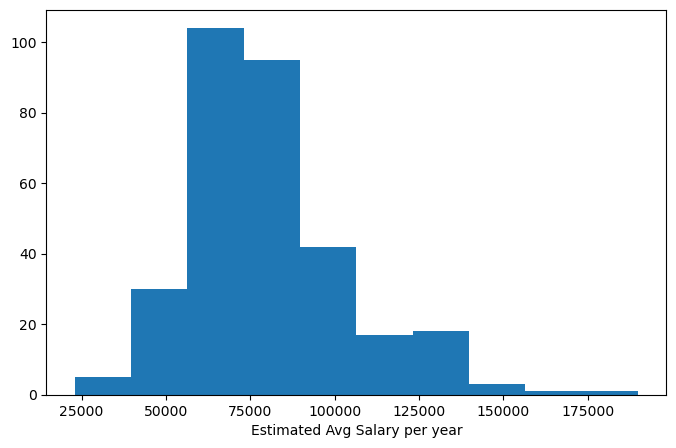

In [101]:
# Setup graphic color and grid style
plt.rcParams['figure.figsize'] = 8, 5
base_color = sb.color_palette('colorblind')[0]

# Plot yearly salary distribution
plt.hist(data=master_df, x='salary_avg_estimate_yr')
plt.xlabel('Estimated Avg Salary per year');

The average salary distribution is right-skewed. The majority of the average salary is bewteen `$70,000` and `$90,000` per year.

### 2. Simple Job title

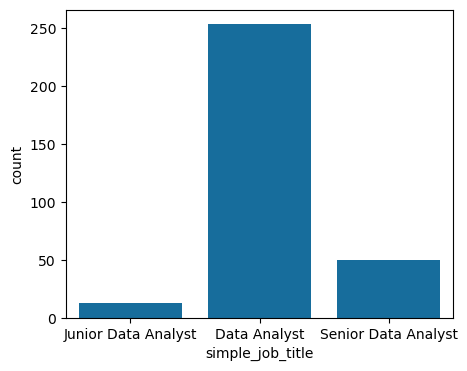

In [102]:
fig, ax = plt.subplots(ncols=1, figsize = [5,4])
sb.countplot(data = master_df, x = 'simple_job_title', color = base_color)
plt.show()

Most of the data analyst job postings are Data Analyst, which requires 3 to 5 years of experience. Only a few companies are filling in Junior Data Analyst positions.

### 3. Company rating and other ratings

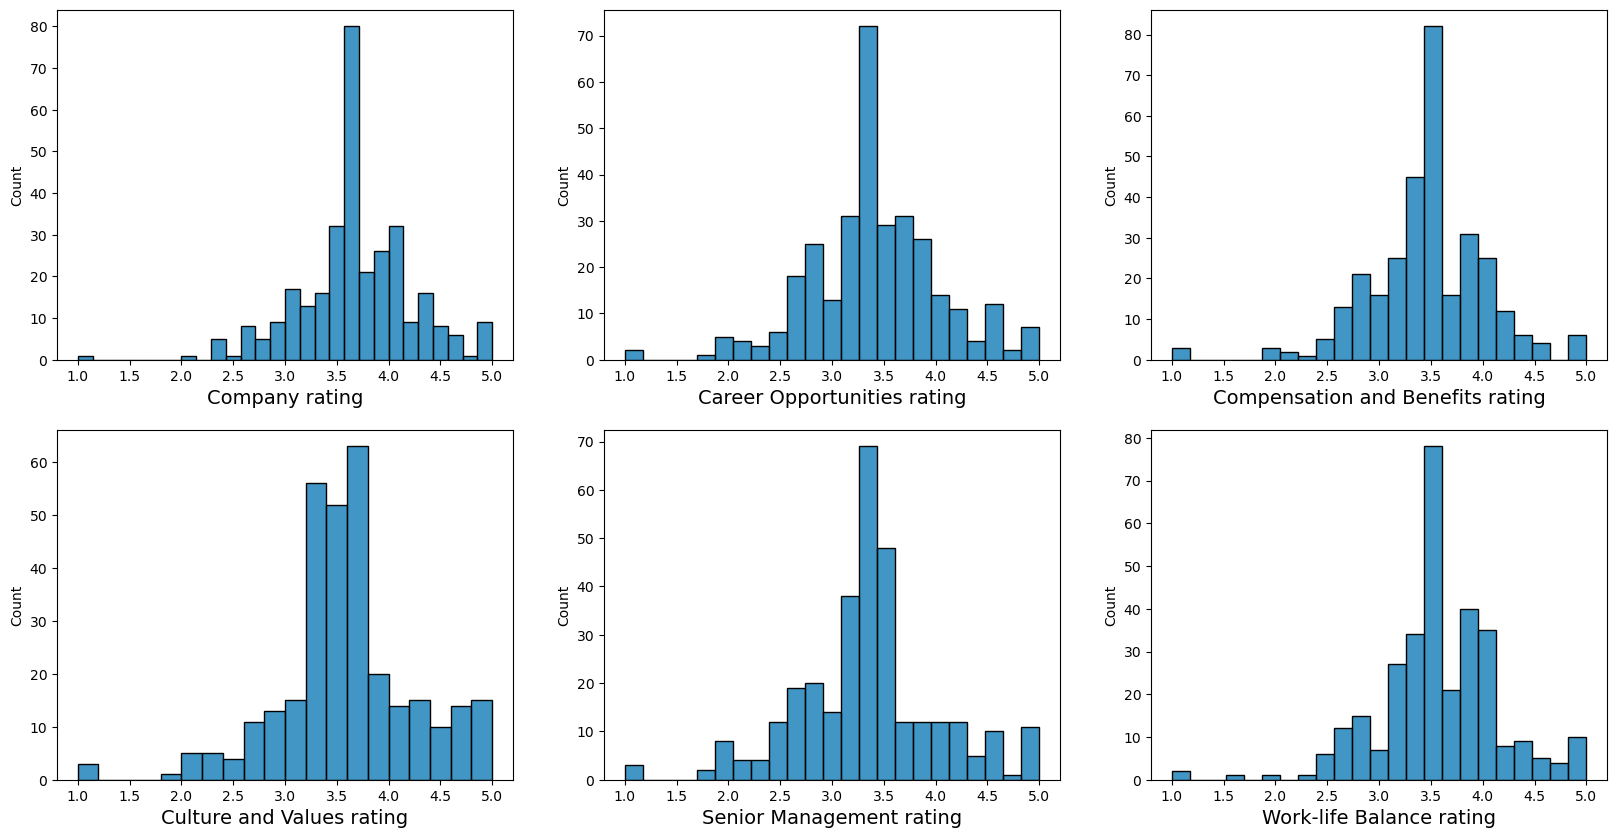

In [103]:
# let's plot all ratings together
# to get an idea of each variable's distribution

fig, ax = plt.subplots(nrows=2, ncols=3, figsize = [20,10])
base_color = sb.color_palette('colorblind')[0]

sb.histplot(data = master_df, x = 'company_rating', color = base_color, ax = ax[0,0])
sb.histplot(data = master_df, x = 'career_opportunities_rating', color = base_color, ax = ax[0,1])
sb.histplot(data = master_df, x = 'comp_and_benefits_rating', color = base_color, ax = ax[0,2])

sb.histplot(data = master_df, x = 'culture_and_values_rating', color = base_color, ax = ax[1,0])
sb.histplot(data = master_df, x = 'senior_management_rating', color = base_color, ax = ax[1,1])
sb.histplot(data = master_df, x = 'work_life_balance_rating', color = base_color, ax = ax[1,2])

ax[0,0].set_xlabel("Company rating",fontsize=14)
ax[0,1].set_xlabel("Career Opportunities rating", fontsize=14)
ax[0,2].set_xlabel("Compensation and Benefits rating",fontsize=14)
ax[1,0].set_xlabel("Culture and Values rating",fontsize=14)
ax[1,1].set_xlabel("Senior Management rating", fontsize=14)
ax[1,2].set_xlabel("Work-life Balance rating",fontsize=14)

plt.show()


Most of the companies have 3.5 to 4.0 for company rating, career and opportunity, compensation and benefits, culture and values, and work-life balance ratings. Only seinor managment rating has the hight distribution below 3.5. 

### 4. Location of job postings

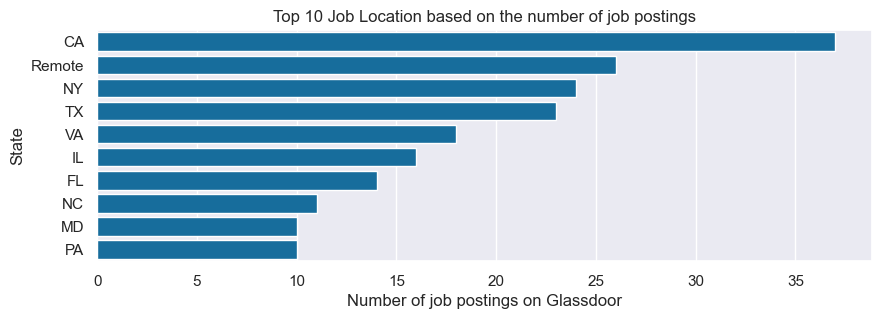

In [104]:
job_state_list = master_df.job_state.value_counts()[:10].index.tolist()
job_state_count= master_df.job_state.value_counts()[:10].values.tolist()

sb.set(rc={'figure.figsize':(10,3)}, font_scale=1.0)
ax = sb.barplot(x = job_state_count ,y = job_state_list, color=base_color)    
ax.set(xlabel='Number of job postings on Glassdoor', ylabel='State',  \
      title = 'Top 10 Job Location based on the number of job postings')
plt.show()

### 5. Job description length and key words

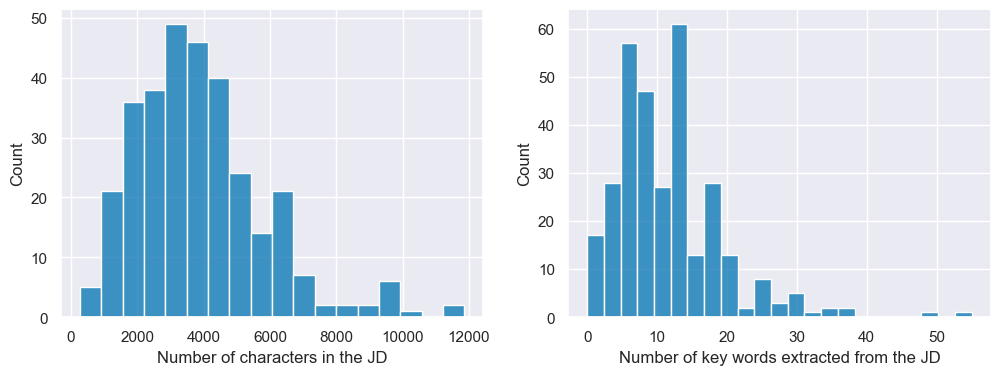

In [105]:
fig, ax = plt.subplots(ncols=2, figsize=[12,4])

sb.histplot(data = master_df, x = 'desc_len', color = base_color, ax = ax[0])
sb.histplot(data = master_df, x = 'num_keywords', color = base_color, ax = ax[1])

ax[0].set_xlabel("Number of characters in the JD",fontsize=12)
ax[1].set_xlabel("Number of key words extracted from the JD", fontsize=12);

Majority of the job descriptions have 3500 characters and 10 key words of data skils.

### 6. Other company factors: 'company_size', 'employment_type', 'industry', 'sector', 'revenue'

In [106]:
# Company size
company_size_list = master_df.company_size.value_counts().index.tolist()
company_size_count= master_df.company_size.value_counts().values.tolist()

# Employment type 
employment_type_list = master_df.employment_type.value_counts().index.tolist()
employment_type_count= master_df.employment_type.value_counts().values.tolist()

# Industry
industry_list = master_df.industry.value_counts()[:11].index.tolist()
industry_count= master_df.industry.value_counts()[:11].values.tolist()

# Sector
sector_list = master_df.sector.value_counts()[:11].index.tolist()
sector_count= master_df.sector.value_counts()[:11].values.tolist()

# Revenue
revenue_list = master_df.revenue.value_counts().index.tolist()
revenue_count= master_df.revenue.value_counts().values.tolist()

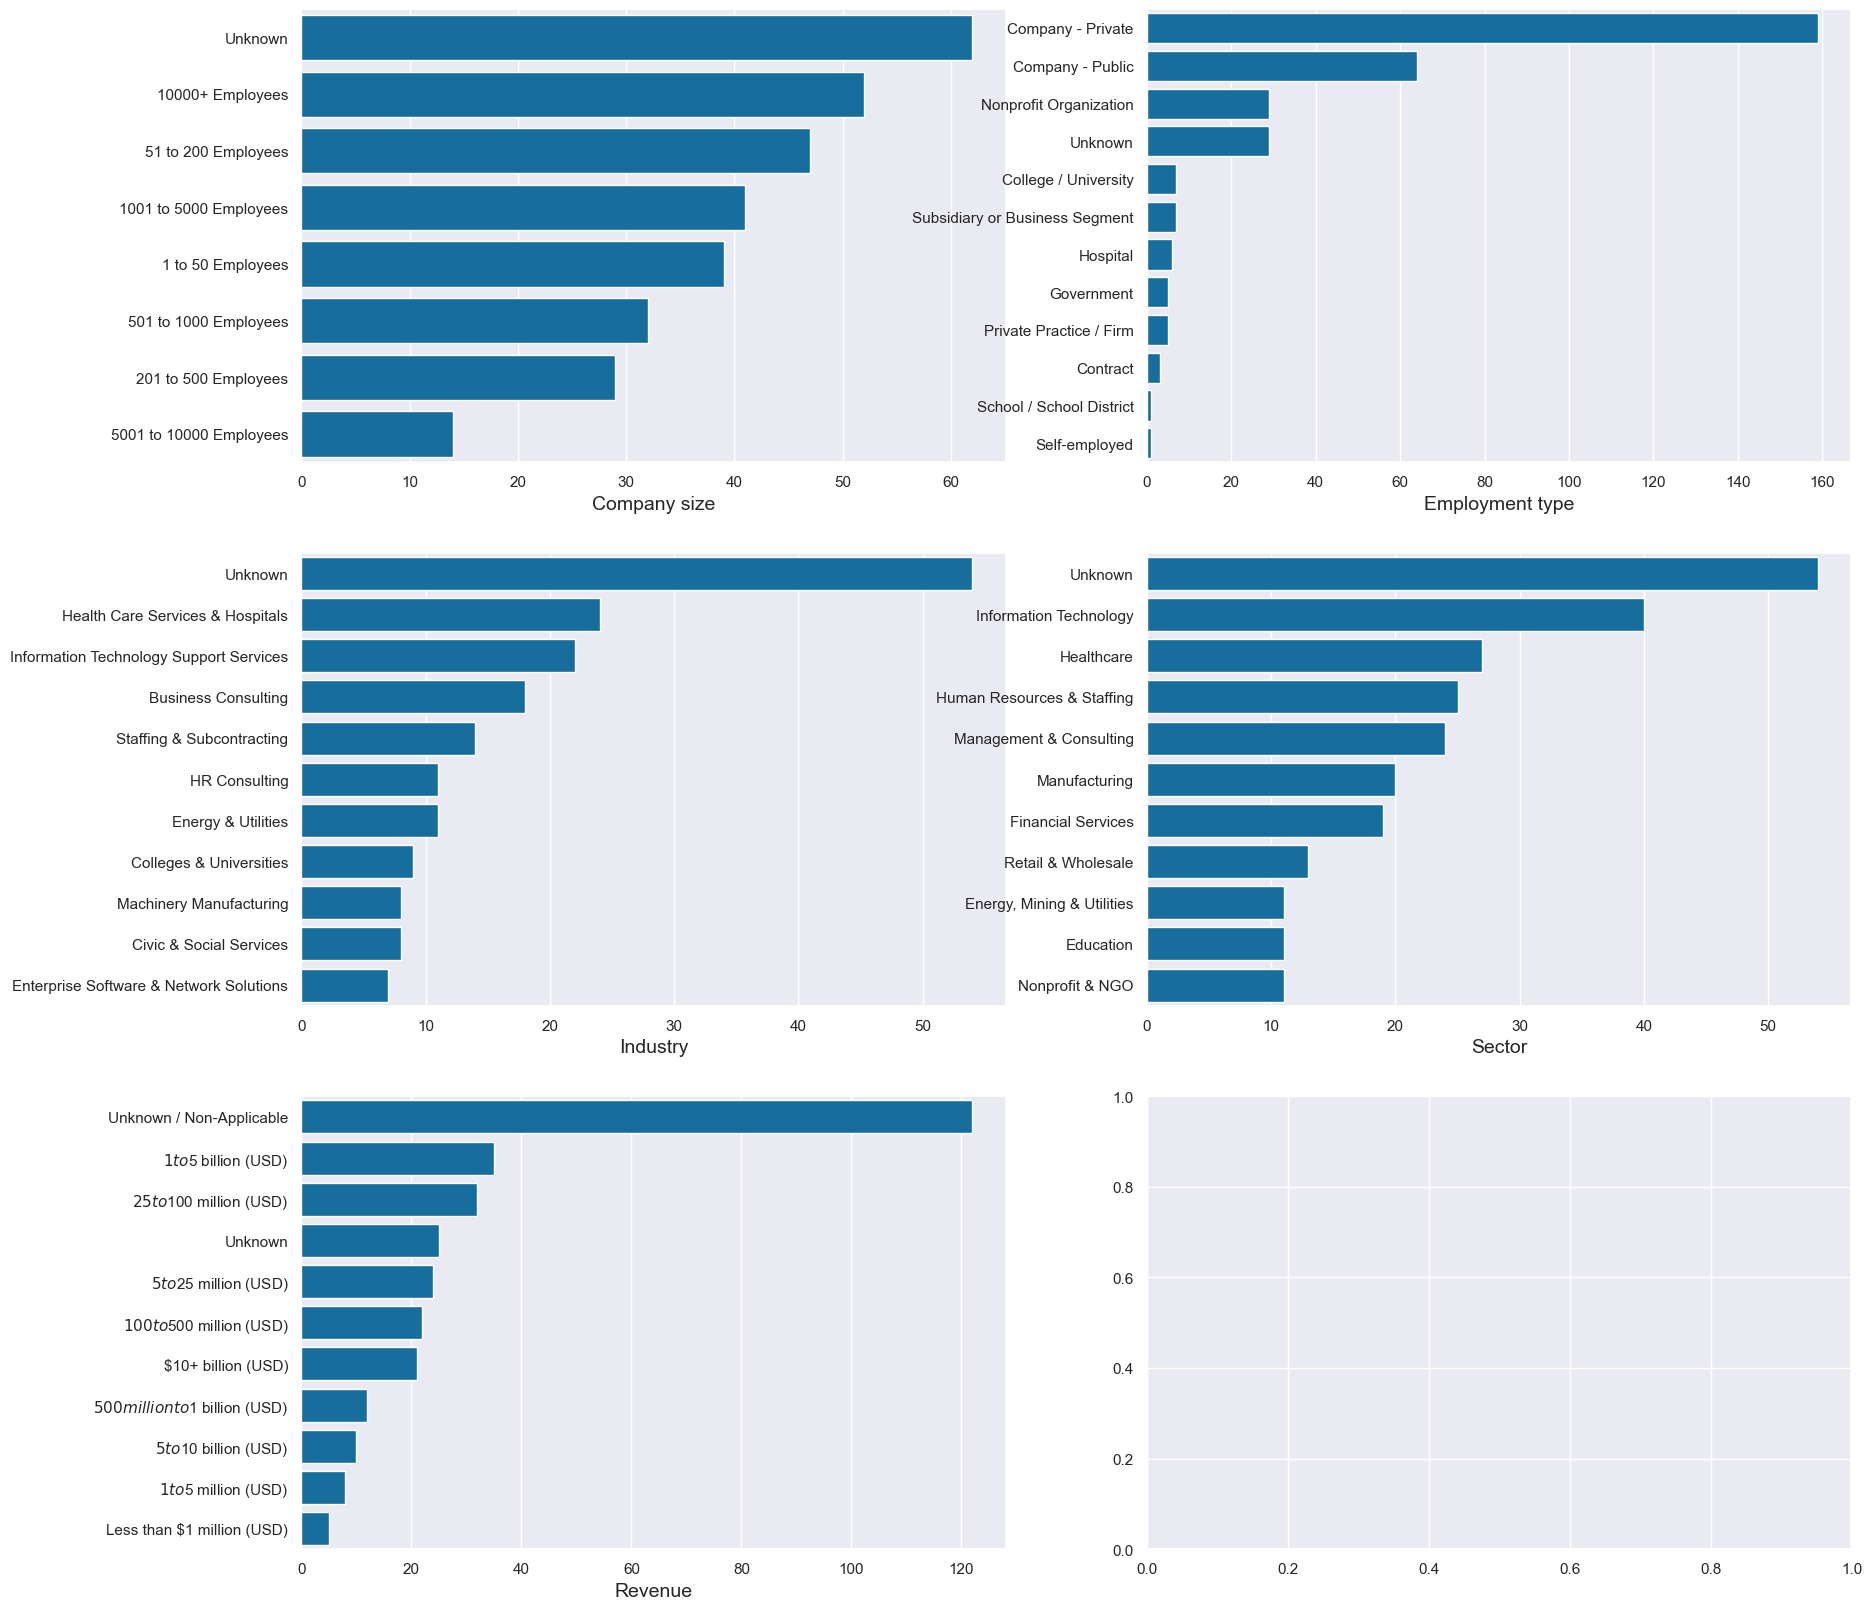

In [107]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = [20,20])
base_color = sb.color_palette('colorblind')[0]

sb.barplot(x = company_size_count, y = company_size_list, color=base_color, ax = ax[0,0])
sb.barplot(x = employment_type_count, y = employment_type_list, color = base_color, ax = ax[0,1])
sb.barplot(x = industry_count, y = industry_list, color = base_color, ax = ax[1,0])
sb.barplot(x = sector_count, y = sector_list, color = base_color, ax = ax[1,1])
sb.barplot(x = revenue_count, y = revenue_list, color = base_color, ax = ax[2,0])

ax[0,0].set_xlabel("Company size",fontsize=14)
ax[0,1].set_xlabel("Employment type", fontsize=14)
ax[1,0].set_xlabel("Industry",fontsize=14)
ax[1,1].set_xlabel("Sector",fontsize=14)
ax[2,0].set_xlabel("Revenue", fontsize=14);

## Bivariate Exploration

## Multivariate Exploration

## Word Cloud with Job Descriptions

In [111]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [118]:
da_df_copy = da_df_clean.copy()

In [119]:
# Create a list with all the words that were tweeted in our DataFrame.
descriptions = np.array(da_df_copy.job_description)
my_list = []
for desc in descriptions:
    my_list.append(desc.replace(r'https://t.co/',''))

In [129]:
#  Function to generate a word cloud with the tweets
def gen_wc(text):
    word_cloud = WordCloud(width = 1000, height = 800, background_color='white').generate(str(text))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='red')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

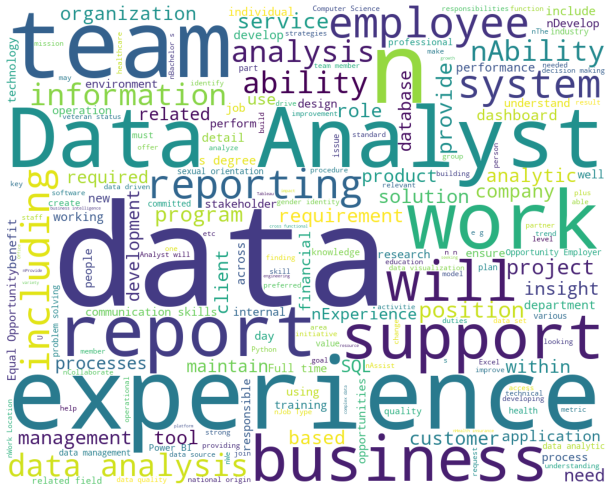

In [137]:
plt.rcParams.update({'figure.figsize':(50,30), 'figure.dpi':60})
gen_wc(text=my_list)